## Probability Theory

### 1.  Bayesian probabilities

根据贝叶斯概率公式:
$$
p\left(w|\mathcal{D}\right) = \frac{p\left(\mathcal{D}| w\right) p\left(w \right) }{p\left(\mathcal{D}\right) }\\
后验概率 \propto 似然概率 \times 先验概率
$$

其中认为 $p\left(\mathcal{D}| w\right) $是似然概率，也就是在给定模型的情况下，数据在该模型下出现的概率，一般地，我们在用最大似然方法估计模型参数的时候，主要就是在求使得当前似然函数取最大的时候（也就是当前数据分布概率最大的情况下， **注，这时候，模型是已知的，仅为了求模型的具体数值**），模型参数$w$的数值。

例如：[抛硬币的最大似然和最大后验解释](http://www.cnblogs.com/sylvanas2012/p/5058065.html)

    通俗一点解释就是说，我们在用最大似然的过程中并没有给定我们对于模型的评价，在抛硬币的解释中，我们一般会对模型参数有一个大概的认识，用来修正我们对模型的计算结果；
 在通俗一点，假设我们碰到一个人，打羽毛球打得非常好，现在需要判断他打了多少长时间羽毛球，假设，羽毛球时长和技术水平成正比，单纯来说，我们会根据他打羽毛球的落点精准性和练球时长来呼应判断，这里，打过去的羽毛球落点也就是采集数据$\mathcal{D}$， 然后打羽毛球的时长就是$w$, 现在需要求最大似然$p\left(\mathcal{D}| w\right) $；然而，他其实每个人的悟性也是有差异的，比如有的人学得快，很短时间就可以掌握技术动作，所以人与人之间的差异性也影响了我们的判断，也就是$p\left(w \right) $也是一个随机变量，我们会先有一个假设，比如在这个技术水平下，100个小时的练习时间概率比较大，这就是$p\left(w \right) $先验概率，最后在综合起来，我们就可以用$p\left(\mathcal{D}| w\right)p\left(w \right) $综合判断这个人的练习时间；


### 2. Gaussian Distribution

$D$维高斯分布可以表示为
$$
\mathcal{N}\left(\bf{x} | \bf{\mu, \Sigma}\right) = \frac{1}{\left(2\pi\right)^{D/2}}\frac{1}{\left|\Sigma\right|^{1/2}}
                                   \exp\{-\frac{1}{2}\left(\bf{x}-\bf{\mu}\right)^T\Sigma^{-1}\left(\bf{x}-\bf{\mu}\right)\}
$$

其中 $\left|\Sigma\right|$ 表示协方差矩阵$\Sigma$的行列式。

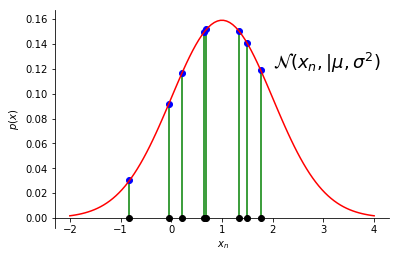

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

x_n =  np.random.randn(8)+ 1;
y_n = np.array([[0]*8]); y_n = y_n.transpose();
y_n_bdots = 1/2/np.pi * np.exp(-(x_n-1)**2/2);    
fig,ax =plt.subplots();
x_n_line = np.linspace(-2, 4, 100)
y_n_line = 1/2/np.pi * np.exp(-(x_n_line-1)**2/2);                         
plt.plot(x_n, y_n,'ko',x_n,y_n_bdots,'bo',x_n_line, y_n_line, 'r-');
plt.vlines(x_n, [0], y_n_bdots, 'g'); # 画绿色的投影线

ax.spines['right'].set_visible(False) # 取消显示右边界
ax.spines['top'].set_visible(False)   # 取消显示上边边界
ax.spines['bottom'].set_position(('data', 0)) # 将x坐标移到 y=0 位置
plt.xlabel(' $x_n$');  plt.ylabel('$p( x )$');
plt.text(2,0.12, r'$ \mathcal{N}(x_n, | \mu, \sigma^2)$',fontsize = 18);

上图中，我们假设采集到N 个的观测值$\bf{x} = \left(x_1, x_2, ... x_N\right)^T$， 首先需要假设这些点都是独立的采集自同一个高斯分布模型，且模型的参数$\left(\mu, \sigma^2\right)$未知，现在我们需要对模型中的参数包括均值和方差进行估计。由于数据采集是i.i.d的，那么可以得到采集数据的概率：$p\left(\bf{x}| \mu, \sigma^2\right) = \prod_{n=1}^{N}\mathcal{N}\left(x_n|\mu, \sigma^2\right) $.

为了能够估计模型中的参数，假设模型参数为$\left(\mu_{ML}, \sigma^2_{ML}\right)$, 那么应该满足在该估计值下，似然函数$p\left(\bf{x}| \mu, \sigma^2\right)$的概率是最大的，也就是说，在估计值模型下采集的数据应大于在任何其他模型产生当前数据集$\bf{x}$的概率.

$$
\left(\mu_{ML}, \sigma^2_{ML}\right) =\underset{\mu, \sigma^2}{\arg \max}\ \ p\left(\bf{x}| \mu, \sigma^2\right)
$$
一般地，对数函数不改变函数的单调性质，因此采用对$p\left(\bf{x}| \mu, \sigma^2\right)$的对数最大 $\ln p\left(\bf{x}| \mu, \sigma^2\right)$,得到估计值：
$$
\begin{split}
\mu_{ML} &= \frac{1}{N}\sum_{n=1}{N}x_n \\
\sigma^2_{ML} &= \frac{1}{N}\sum_{n=1}^{N} \left(x_n- \mu_{ML}\right)^2
\end{split}
$$
** 注： 上述均值的估计值是无偏的也即$\mathbb{E}\left[ \mu_{ML} \right] =\mu $, 很容易验证；而对于方差的估计值,是有偏估计**，由于 
$$
\begin{split}
\mathbb{E}\left[\sigma^2_{ML}\right] &= \mathbb{E}\left[ \frac{1}{N}\sum_{n=1}^{N} \left(x_n- \mu_{ML}\right)^2 \right]= \frac{1}{N}\sum_{n=1}^{N}\mathbb{E}\left[\left(x_n- \mu_{ML}\right)^2 \right]\\
&=\frac{1}{N}\sum_{n=1}^{N} \mathbb{E} \left( x_n^2 -2x_n\mu_{ML}+\mu_{ML}^2 \right) \\
&=\frac{1}{N}\sum_{n=1}^{N} \left[ \mathbb{E}\left(x_n^2 \right)- \frac{2}{N}\mathbb{E}\left(x_n \sum_{n=1}^N x_n\right) +\frac{1}{N^2}\mathbb{E}\left(\sum_{n=1}^N x_n\right)^2 \right]
& = \frac{1}{N}\sum_{n=1}^{N}\left[\sigma^2-\frac{2}{N}\sigma^2 +\frac{1}{N}\sigma^2 + \mu^2-2\mu^2+\mu^2\right]\\
&=\frac{N-1}{N}\sigma^2
\end{split}
$$
在对方差进行估计的过程中，出现右偏是因为前面的估计值中运用的是**估计的均值，而不是实际的均值**，估计的均值并不是常量，而是一个带有方差的随机变量，正是由于估计的均值方差带来了最终的方差偏移.,[为什么是有偏估计](https://www.zhihu.com/question/38185998)

## 3 Curve Fitting re-visited
数据：$\bf{x}=\left(x_1, x_2,\ldots, x_N\right)^T; \bf{t}=\left(t_1, t_2, \ldots, t_N\right)^T$;

假设： $p\left(t | x,\bf{w}, \beta \right) = \mathcal{N}\left(t | y\left(x,\bf{w}\right), \beta^{-1}\right)$

求： $\bf{w}$;

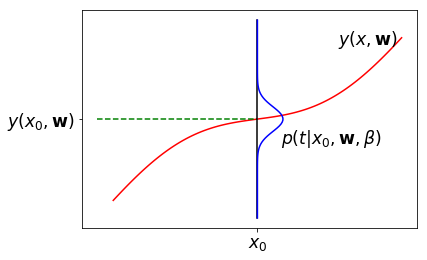

In [2]:
from scipy.stats import norm
x_n_observe = np.linspace(-0.9,0.9, 100);
t_n_observe = 4* x_n_observe -np.sin(x_n_observe * np.pi);
fig,ax = plt.subplots();

plt.plot(x_n_observe, t_n_observe, 'r-');
y_norm = np.linspace(-4,4, 100); x_norm = norm.pdf(y_norm,scale = 0.5)/5;
ax.plot([-1, 0], [0, 0], "g--");ax.plot([0, 0], [-4, 4], "k");
plt.plot(x_norm, y_norm,'b-');
ax.text(0.15, -1, r'$p(t|x_0,\mathbf{w}, \beta)$', fontsize="xx-large")
ax.text(0.5, 3, r'$y(x, \mathbf{w})$', fontsize="xx-large");

ax.set_xticks([0])
ax.set_xticklabels([r'$x_0$'], fontsize="xx-large")
ax.set_yticks([0])
ax.set_yticklabels([r'$y(x_0, \mathbf{w})$'], fontsize="xx-large")

因此，似然函数表示为： $ p\left(\bf{t} |\bf{ x},\bf{w}, \beta \right) = \prod_{n=1}^{N}\mathcal{N}\left(t | y\left(x_n,\bf{w}\right), \beta^{-1}\right) $
取对数后，与前面的二次误差最小有同样的结果。

### 最大后验概率

进一步假设，模型中点所在位置的方差是一个高斯随机变量：$p\left( \bf{w} | \alpha \right) = \mathcal{N}\left(0, \alpha^{-1}\bf{I}\right) = \left(\frac{\alpha}{2\pi}\right)^{\left(M+1\right)/2}\exp\left[ -\frac{\alpha}{2} \bf{w}^T\bf{w} \right]$.

最大后验： $ p\left(\bf{w} | \bf{x},\bf{t}, \alpha, \beta \right) \propto p\left(\bf{t} |\bf{ x},\bf{w}, \beta \right)p\left( \bf{w} | \alpha \right)  $

因此，通过最大化$\ln \left(\bf{w} | \bf{x},\bf{t}, \alpha, \beta \right)$, 可以得到与前面二次函数正则化同样的结果(令 正则化项的参数满足$\lambda = \frac{\alpha}{\beta}$)
$$
\bf{w}*   =  \underset{\bf{w}}{\arg\min} \frac{\beta}{2}\sum_{n=1}^{N}\{ y\left(x_n, \bf{w}\right)-t_n \}^2+\frac{\alpha}{2}\bf{w}^T\bf{w}
$$

## 4. Bayesian curve Fitting

在贝叶斯曲线拟合中，我们可以预测给定观测点出取值的分布，也即,假设$x$为一个新的观测点：
$$
p\left(t |x, \bf{x},\bf{t}\right) = \int p\left(t | x, \bf{w}\right)p\left(\bf{w} | \bf{x}, \bf{t}\right)d\bf{w}
$$
注： 其中 $p\left(t | x, \bf{w}\right)$ 为高斯函数和$p\left(\bf{w} | \bf{x}, \bf{t}\right) $也是假设的高斯分布，通过前面对最大后验的方法可以有训练数据得到，过程中需要预先给定参数 $\beta、 \alpha$.

然而实际上，后面的分析可以得到，$p\left(t |x, \bf{x},\bf{t}\right)$也是一个高斯分布的形式，其中均值和方差都可以计算.